## Finding the Best Hospital Neighborhood for Traveling Nurses - New York

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


print('Libraries imported.')

Libraries imported.


In [2]:
#This install may take 30 minutes
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

In [3]:
# notice: installing seaborn might 15 minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.6.20-hecda079_0     conda-forge --> 2020.6.24-0       anaconda
    certifi:         2020.6.20-py36h9f0ad1d_0 conda-forge --> 2020.6.20-py36_0  anaconda
    seaborn:         0.9.0-pyh91ea838_1                   --> 0.10.

In [4]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

## 1. Download and Explore the Hospital Ratings Dataset

### The Hospital Rating data is available in the United States from Medicare. 
https://www.medicare.gov/hospitalcompare/Data/Hospital-overall-ratings-calculation.html

#### More information on the Methodology to calculate the rating can be found here:
https://www.qualitynet.org/inpatient/public-reporting/overall-ratings

The overall hospital quality star rating is based on measures across 7 areas of quality.

<p> 1- Mortality
<p> 2- Safety of Care
<p> 3- Readmission
<p> 4- Patient Experience
<p> 5- Effectiveness of Care
<p> 6- Timeliness of Care
<p> 7- Efficient Use of Medical Imaging

<p> The ratings in these seven areas are combined into a star rating for each hospital (range of 1-5 starts). There are up to 51 measures across the 7 categories,
    <p> but hospital ratings are only calculated using those measures for which data are available. 
    <p> The average hospital rating is based on about 37 measures. A hospital summary score is then calculated by taking the weighted average of these group scores. 
        <p> If a hospital is missing a measure category or group, the weights are redistributed amongst the qualifying measure categories or groups.
    
<p> Hospitals in the United States (excluding Veternas Affairs and Dept of Defense Hospitals) report data to the Centers for Medicare & Medicaid Services. This includes about 4,000 Medicare-certified hospitals across the country.
    
<b> The complete data set of all Hospital Measures is here:
        https://data.medicare.gov/data/hospital-compare
        
The file - "Hospital_General_Information" was imported as a CSV for this analysis.

In [591]:
# The code was removed by Watson Studio for sharing.

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,400079,HOSP COMUNITARIO BUEN SAMARITANO,CARR.2 KM.1.4 AVE. SEVERIANO CUEVAS #18,AGUADILLA,PR,603,AGUADILLA,(787) 658-0000,Acute Care Hospitals,Voluntary non-profit - Other,Yes,Y,Not Available,16.0,Not Available,5.0,Not Available,16.0,Below the national average,NaN,Not Available,16.0,Not Available,5.0,Not Available,5.0,Not Available,16.0,NaN
1,400087,HOSPITAL DR CAYETANO COLL Y TOSTE,CARRETERA 129 KM.1 AVENIDA SAN LUIS,ARECIBO,PR,613,ARECIBO,(787) 650-7272,Acute Care Hospitals,Proprietary,Yes,Y,Not Available,16.0,Not Available,5.0,Not Available,16.0,Not Available,5.0,Not Available,16.0,Not Available,5.0,Not Available,5.0,Not Available,16.0,NaN
2,400117,HOSPITAL DR SUSONI INC,55 PALM ST,ARECIBO,PR,614,ARECIBO,(787) 650-1031,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,Not Available,16.0,Not Available,16.0,Not Available,16.0,Not Available,5.0,Not Available,16.0,Not Available,5.0,Not Available,5.0,Not Available,16.0,NaN
3,404007,HOSPITAL PSIQUIATRICO METROPOLITANO CABO ROJO,108 MUNOZ RIVERA STREET,BO BALLAJA,PR,623,CABO ROJO,(787) 851-2025,Psychiatric,Proprietary,Yes,NaN,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,NaN
4,400010,HOSPITAL GENERAL DE CASTANER,CARR 135 KM 64 2,CASTANER,PR,631,LARES,(787) 829-5010,Acute Care Hospitals,Voluntary non-profit - Private,Yes,NaN,Not Available,16.0,Not Available,16.0,Not Available,16.0,Not Available,16.0,Not Available,16.0,Not Available,16.0,Not Available,16.0,Not Available,16.0,NaN


In [592]:
hospitals.shape

(5320, 29)

# Data Preprocessing and Feature Extraction

### Limit data analysis to just the "Hospital Overall Rating Column". Drop other columns

In [593]:
hospitals = hospitals.iloc[0:5320,0:13]
hospitals.head()
                           

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating
0,400079,HOSP COMUNITARIO BUEN SAMARITANO,CARR.2 KM.1.4 AVE. SEVERIANO CUEVAS #18,AGUADILLA,PR,603,AGUADILLA,(787) 658-0000,Acute Care Hospitals,Voluntary non-profit - Other,Yes,Y,Not Available
1,400087,HOSPITAL DR CAYETANO COLL Y TOSTE,CARRETERA 129 KM.1 AVENIDA SAN LUIS,ARECIBO,PR,613,ARECIBO,(787) 650-7272,Acute Care Hospitals,Proprietary,Yes,Y,Not Available
2,400117,HOSPITAL DR SUSONI INC,55 PALM ST,ARECIBO,PR,614,ARECIBO,(787) 650-1031,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,Not Available
3,404007,HOSPITAL PSIQUIATRICO METROPOLITANO CABO ROJO,108 MUNOZ RIVERA STREET,BO BALLAJA,PR,623,CABO ROJO,(787) 851-2025,Psychiatric,Proprietary,Yes,NaN,Not Available
4,400010,HOSPITAL GENERAL DE CASTANER,CARR 135 KM 64 2,CASTANER,PR,631,LARES,(787) 829-5010,Acute Care Hospitals,Voluntary non-profit - Private,Yes,NaN,Not Available


In [594]:
#Remove "Not Available" in rating column and NaN values
hospitals= hospitals.replace(to_replace ="Not Available", 
                 value ="") 
hospitals = hospitals.dropna()
hospitals.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for promoting interoperability of EHRs,Hospital overall rating
0,400079,HOSP COMUNITARIO BUEN SAMARITANO,CARR.2 KM.1.4 AVE. SEVERIANO CUEVAS #18,AGUADILLA,PR,603,AGUADILLA,(787) 658-0000,Acute Care Hospitals,Voluntary non-profit - Other,Yes,Y,
1,400087,HOSPITAL DR CAYETANO COLL Y TOSTE,CARRETERA 129 KM.1 AVENIDA SAN LUIS,ARECIBO,PR,613,ARECIBO,(787) 650-7272,Acute Care Hospitals,Proprietary,Yes,Y,
2,400117,HOSPITAL DR SUSONI INC,55 PALM ST,ARECIBO,PR,614,ARECIBO,(787) 650-1031,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,
6,400114,MANATI MEDICAL CENTER DR OTERO LOPEZ,CALLE HERNANDEZ CARRION URB ATENAS,MANATI,PR,674,MANATI,(787) 621-3700,Acute Care Hospitals,Proprietary,Yes,Y,2
7,400118,"DOCTORS' CENTER HOSPITAL, INC","MARGINAL CARRETERA NO 2, KM 47 7",MANATI,PR,674,MANATI,(787) 853-3322,Acute Care Hospitals,Proprietary,Yes,Y,1


### Remove unnecessary columns and rename to simplify column names

In [595]:
hospitals.drop(['Phone Number'], axis=1, inplace=True)
hospitals.rename(columns={'County Name':'County', 'Hospital overall rating': 'Rating', 'Hospital Type':'Type','Hospital Ownership':'Ownership','ZIP Code':'ZipCode', 'Facility Name':'Facility','Facility ID':'ID', 'Emergency Services':'ER','Meets criteria for promoting interoperability of EHRs':'interop-EHR'}, inplace=True)
hospitals.head()

,ID,Facility,Address,City,State,ZipCode,County,Type,Ownership,ER,interop-EHR,Rating
0,400079,HOSP COMUNITARIO BUEN SAMARITANO,CARR.2 KM.1.4 AVE. SEVERIANO CUEVAS #18,AGUADILLA,PR,603,AGUADILLA,Acute Care Hospitals,Voluntary non-profit - Other,Yes,Y,
1,400087,HOSPITAL DR CAYETANO COLL Y TOSTE,CARRETERA 129 KM.1 AVENIDA SAN LUIS,ARECIBO,PR,613,ARECIBO,Acute Care Hospitals,Proprietary,Yes,Y,
2,400117,HOSPITAL DR SUSONI INC,55 PALM ST,ARECIBO,PR,614,ARECIBO,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,
6,400114,MANATI MEDICAL CENTER DR OTERO LOPEZ,CALLE HERNANDEZ CARRION URB ATENAS,MANATI,PR,674,MANATI,Acute Care Hospitals,Proprietary,Yes,Y,2
7,400118,"DOCTORS' CENTER HOSPITAL, INC","MARGINAL CARRETERA NO 2, KM 47 7",MANATI,PR,674,MANATI,Acute Care Hospitals,Proprietary,Yes,Y,1


In [596]:
#Convert presence of ER to numerical values
hospitals['ER'].replace(to_replace=['Yes','No'], value=[0,1],inplace=True)
hospitals.head()

,ID,Facility,Address,City,State,ZipCode,County,Type,Ownership,ER,interop-EHR,Rating
0,400079,HOSP COMUNITARIO BUEN SAMARITANO,CARR.2 KM.1.4 AVE. SEVERIANO CUEVAS #18,AGUADILLA,PR,603,AGUADILLA,Acute Care Hospitals,Voluntary non-profit - Other,0,Y,
1,400087,HOSPITAL DR CAYETANO COLL Y TOSTE,CARRETERA 129 KM.1 AVENIDA SAN LUIS,ARECIBO,PR,613,ARECIBO,Acute Care Hospitals,Proprietary,0,Y,
2,400117,HOSPITAL DR SUSONI INC,55 PALM ST,ARECIBO,PR,614,ARECIBO,Acute Care Hospitals,Voluntary non-profit - Private,0,Y,
6,400114,MANATI MEDICAL CENTER DR OTERO LOPEZ,CALLE HERNANDEZ CARRION URB ATENAS,MANATI,PR,674,MANATI,Acute Care Hospitals,Proprietary,0,Y,2
7,400118,"DOCTORS' CENTER HOSPITAL, INC","MARGINAL CARRETERA NO 2, KM 47 7",MANATI,PR,674,MANATI,Acute Care Hospitals,Proprietary,0,Y,1


In [597]:
#Convert hospital ownership to numerical values
#'Voluntary non-profit - Other'= 0
#'Proprietary' = 1
#'Voluntary non-profit - Private' = 2
#'Voluntary non-profit - Church'= 3
#'Government - State'= 4
#'Government - Local'= 5
#'Government - Federal'= 6
#'Government - Hospital District or Authority' = 7
#'Department of Defense'= 8
#'Physician' = 9
# 'Tribal' =10
hospitals['Ownership'].replace(to_replace=['Voluntary non-profit - Other','Proprietary','Voluntary non-profit - Private','Voluntary non-profit - Church','Government - State','Government - Local','Government - Federal','Government - Hospital District or Authority','Department of Defense','Physician','Tribal'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
hospitals.head()

,ID,Facility,Address,City,State,ZipCode,County,Type,Ownership,ER,interop-EHR,Rating
0,400079,HOSP COMUNITARIO BUEN SAMARITANO,CARR.2 KM.1.4 AVE. SEVERIANO CUEVAS #18,AGUADILLA,PR,603,AGUADILLA,Acute Care Hospitals,0,0,Y,
1,400087,HOSPITAL DR CAYETANO COLL Y TOSTE,CARRETERA 129 KM.1 AVENIDA SAN LUIS,ARECIBO,PR,613,ARECIBO,Acute Care Hospitals,1,0,Y,
2,400117,HOSPITAL DR SUSONI INC,55 PALM ST,ARECIBO,PR,614,ARECIBO,Acute Care Hospitals,2,0,Y,
6,400114,MANATI MEDICAL CENTER DR OTERO LOPEZ,CALLE HERNANDEZ CARRION URB ATENAS,MANATI,PR,674,MANATI,Acute Care Hospitals,1,0,Y,2
7,400118,"DOCTORS' CENTER HOSPITAL, INC","MARGINAL CARRETERA NO 2, KM 47 7",MANATI,PR,674,MANATI,Acute Care Hospitals,1,0,Y,1


In [598]:
hospitals.shape

(3764, 12)

### Look at Hospital Rating Distribution across All Hospitals in the U.S.

In [599]:
hospitals1 = hospitals[['ID','Ownership','Rating']]
hospitals1.head(10)

,ID,Ownership,Rating
0,400079,0,
1,400087,1,
2,400117,2,
6,400114,1,2
7,400118,1,1
9,400014,3,
10,400123,1,
11,400103,1,2
12,400126,1,
13,400021,3,


In [600]:
hospitals1.dtypes

ID           object
Ownership     int64
Rating       object
dtype: object

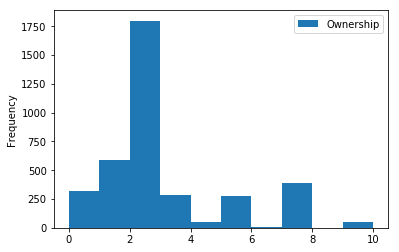

In [601]:
hospitals1.plot.hist(by='Ownership')

### Conclusion - Most hospitals in the U.S. are 'Voluntary non-profit - Private'

## Narrowing the Hospitals DataFrame to just NYC Hospitals in the 5 Buroughs

In [602]:
#what is the starting size of the dataframe?
hospitals.shape

(3764, 12)

In [603]:
#reset index to State and remove states that are not NY
hospitals = hospitals.set_index('State')
hospitalsNY= hospitals.loc[['NY']]
hospitalsNY

,ID,Facility,Address,City,ZipCode,County,Type,Ownership,ER,interop-EHR,Rating
State,,,,,,,,,,,
NY,330214,NEW YORK UNIVERSITY LANGONE MEDICAL CENTER,550 FIRST AVENUE,NEW YORK,10016,NEW YORK,Acute Care Hospitals,2,0,Y,5
NY,330204,BELLEVUE HOSPITAL CENTER,462 FIRST AVENUE,NEW YORK,10016,NEW YORK,Acute Care Hospitals,5,0,Y,1
NY,330046,MOUNT SINAI ST LUKE'S ROOSEVELT HOSPITAL,1000 TENTH AVENUE,NEW YORK,10019,NEW YORK,Acute Care Hospitals,2,0,Y,4
NY,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,10021,NEW YORK,Acute Care Hospitals,2,0,Y,5
NY,330119,LENOX HILL HOSPITAL,100 EAST 77TH STREET,NEW YORK,10021,NEW YORK,Acute Care Hospitals,2,0,Y,3
NY,330199,METROPOLITAN HOSPITAL CENTER,1901 FIRST AVENUE,NEW YORK,10029,NEW YORK,Acute Care Hospitals,5,0,Y,2
NY,330024,MOUNT SINAI HOSPITAL,ONE GUSTAVE L LEVY PLACE,NEW YORK,10029,NEW YORK,Acute Care Hospitals,2,0,Y,4
NY,330240,HARLEM HOSPITAL CENTER,506 LENOX AVENUE,NEW YORK,10037,NEW YORK,Acute Care Hospitals,5,0,Y,1
NY,330101,NEW YORK-PRESBYTERIAN HOSPITAL,525 EAST 68TH STREET,NEW YORK,10065,NEW YORK,Acute Care Hospitals,2,0,Y,3


In [604]:
#When we reset the index, the old index is added as a column, and a new sequential index is used
hospitalsNY = hospitalsNY.reset_index()
hospitalsNY.head()

,State,ID,Facility,Address,City,ZipCode,County,Type,Ownership,ER,interop-EHR,Rating
0,NY,330214,NEW YORK UNIVERSITY LANGONE MEDICAL CENTER,550 FIRST AVENUE,NEW YORK,10016,NEW YORK,Acute Care Hospitals,2,0,Y,5
1,NY,330204,BELLEVUE HOSPITAL CENTER,462 FIRST AVENUE,NEW YORK,10016,NEW YORK,Acute Care Hospitals,5,0,Y,1
2,NY,330046,MOUNT SINAI ST LUKE'S ROOSEVELT HOSPITAL,1000 TENTH AVENUE,NEW YORK,10019,NEW YORK,Acute Care Hospitals,2,0,Y,4
3,NY,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,10021,NEW YORK,Acute Care Hospitals,2,0,Y,5
4,NY,330119,LENOX HILL HOSPITAL,100 EAST 77TH STREET,NEW YORK,10021,NEW YORK,Acute Care Hospitals,2,0,Y,3


In [605]:
#Set the index to county so that we can filter on the counties representing the NYC burourghs
hospitalsNY = hospitalsNY.set_index('County')
hospitalsNY.head()

,State,ID,Facility,Address,City,ZipCode,Type,Ownership,ER,interop-EHR,Rating
County,,,,,,,,,,,
NEW YORK,NY,330214,NEW YORK UNIVERSITY LANGONE MEDICAL CENTER,550 FIRST AVENUE,NEW YORK,10016,Acute Care Hospitals,2,0,Y,5
NEW YORK,NY,330204,BELLEVUE HOSPITAL CENTER,462 FIRST AVENUE,NEW YORK,10016,Acute Care Hospitals,5,0,Y,1
NEW YORK,NY,330046,MOUNT SINAI ST LUKE'S ROOSEVELT HOSPITAL,1000 TENTH AVENUE,NEW YORK,10019,Acute Care Hospitals,2,0,Y,4
NEW YORK,NY,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,10021,Acute Care Hospitals,2,0,Y,5
NEW YORK,NY,330119,LENOX HILL HOSPITAL,100 EAST 77TH STREET,NEW YORK,10021,Acute Care Hospitals,2,0,Y,3


In [606]:
#filter the data set on the 5 buroughs or counties in NYC
hospitalsNY= hospitalsNY.loc[['BRONX','NEW YORK','QUEENS','KINGS','RICHMOND']]
hospitalsNY

,State,ID,Facility,Address,City,ZipCode,Type,Ownership,ER,interop-EHR,Rating
County,,,,,,,,,,,
BRONX,NY,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET,BRONX,10451,Acute Care Hospitals,5,0,Y,1
BRONX,NY,330009,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE,BRONX,10456,Acute Care Hospitals,1,0,Y,1
BRONX,NY,330399,ST BARNABAS HOSPITAL,4422 THIRD AVENUE,BRONX,10457,Acute Care Hospitals,2,0,Y,1
BRONX,NY,330127,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH,BRONX,10461,Acute Care Hospitals,5,0,Y,1
BRONX,NY,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE,BRONX,10467,Acute Care Hospitals,5,0,Y,2
BRONX,NY,330059,MONTEFIORE MEDICAL CENTER,111 EAST 210TH STREET,BRONX,10467,Acute Care Hospitals,2,0,Y,1
NEW YORK,NY,330214,NEW YORK UNIVERSITY LANGONE MEDICAL CENTER,550 FIRST AVENUE,NEW YORK,10016,Acute Care Hospitals,2,0,Y,5
NEW YORK,NY,330204,BELLEVUE HOSPITAL CENTER,462 FIRST AVENUE,NEW YORK,10016,Acute Care Hospitals,5,0,Y,1
NEW YORK,NY,330046,MOUNT SINAI ST LUKE'S ROOSEVELT HOSPITAL,1000 TENTH AVENUE,NEW YORK,10019,Acute Care Hospitals,2,0,Y,4


In [607]:
#what is the resulting size of the dataframe now?
hospitalsNY.shape

(32, 11)

In [608]:
hospitalsNY = hospitalsNY.set_index('Type')

In [609]:
#remove psychiatric hospitals
hospitalsNY = hospitalsNY.loc[['Acute Care Hospitals']]
hospitalsNY.head()

,State,ID,Facility,Address,City,ZipCode,Ownership,ER,interop-EHR,Rating
Type,,,,,,,,,,
Acute Care Hospitals,NY,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET,BRONX,10451,5,0,Y,1
Acute Care Hospitals,NY,330009,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE,BRONX,10456,1,0,Y,1
Acute Care Hospitals,NY,330399,ST BARNABAS HOSPITAL,4422 THIRD AVENUE,BRONX,10457,2,0,Y,1
Acute Care Hospitals,NY,330127,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH,BRONX,10461,5,0,Y,1
Acute Care Hospitals,NY,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE,BRONX,10467,5,0,Y,2


In [610]:
#how many hospitals in dataframe after removal of psychiatric hospitals?
hospitalsNY.shape

(32, 10)

In [611]:
#When we reset the index, the old index is added as a column, and a new sequential index is used
hospitalsNY = hospitalsNY.reset_index()
hospitalsNY.head()

,Type,State,ID,Facility,Address,City,ZipCode,Ownership,ER,interop-EHR,Rating
0,Acute Care Hospitals,NY,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET,BRONX,10451,5,0,Y,1
1,Acute Care Hospitals,NY,330009,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE,BRONX,10456,1,0,Y,1
2,Acute Care Hospitals,NY,330399,ST BARNABAS HOSPITAL,4422 THIRD AVENUE,BRONX,10457,2,0,Y,1
3,Acute Care Hospitals,NY,330127,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH,BRONX,10461,5,0,Y,1
4,Acute Care Hospitals,NY,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE,BRONX,10467,5,0,Y,2


In [612]:
#convert ZipCode to integer df['DataFrame Column'] = df['DataFrame Column'].astype(str)
#Need to do this before concatenating columns in the next step
hospitalsNY['ZipCode'] = hospitalsNY['ZipCode'].astype(str)

hospitalsNY.head()

,Type,State,ID,Facility,Address,City,ZipCode,Ownership,ER,interop-EHR,Rating
0,Acute Care Hospitals,NY,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET,BRONX,10451,5,0,Y,1
1,Acute Care Hospitals,NY,330009,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE,BRONX,10456,1,0,Y,1
2,Acute Care Hospitals,NY,330399,ST BARNABAS HOSPITAL,4422 THIRD AVENUE,BRONX,10457,2,0,Y,1
3,Acute Care Hospitals,NY,330127,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH,BRONX,10461,5,0,Y,1
4,Acute Care Hospitals,NY,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE,BRONX,10467,5,0,Y,2


In [613]:
#the Geocoder is having trouble with numeric street names spelled out  like "SIXTH", so convert these numberically before concantenting into the Full Address column
# DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')

hospitalsNY=hospitalsNY.replace(to_replace='SIXTH', value = "6th",regex=True)
hospitalsNY=hospitalsNY.replace(to_replace='TENTH', value = "10th",regex=True)
hospitalsNY=hospitalsNY.replace(to_replace='FIRST', value = "1st",regex=True)
hospitalsNY.head(10)

,Type,State,ID,Facility,Address,City,ZipCode,Ownership,ER,interop-EHR,Rating
0,Acute Care Hospitals,NY,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET,BRONX,10451,5,0,Y,1
1,Acute Care Hospitals,NY,330009,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE,BRONX,10456,1,0,Y,1
2,Acute Care Hospitals,NY,330399,ST BARNABAS HOSPITAL,4422 THIRD AVENUE,BRONX,10457,2,0,Y,1
3,Acute Care Hospitals,NY,330127,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH,BRONX,10461,5,0,Y,1
4,Acute Care Hospitals,NY,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE,BRONX,10467,5,0,Y,2
5,Acute Care Hospitals,NY,330059,MONTEFIORE MEDICAL CENTER,111 EAST 210TH STREET,BRONX,10467,2,0,Y,1
6,Acute Care Hospitals,NY,330214,NEW YORK UNIVERSITY LANGONE MEDICAL CENTER,550 1st AVENUE,NEW YORK,10016,2,0,Y,5
7,Acute Care Hospitals,NY,330204,BELLEVUE HOSPITAL CENTER,462 1st AVENUE,NEW YORK,10016,5,0,Y,1
8,Acute Care Hospitals,NY,330046,MOUNT SINAI ST LUKE'S ROOSEVELT HOSPITAL,1000 10th AVENUE,NEW YORK,10019,2,0,Y,4
9,Acute Care Hospitals,NY,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,10021,2,0,Y,5


In [614]:
#Try this- Concatenate the Address,City, State and ZipCode 
hospitalsNY['FullAddress']= hospitalsNY['Address'] +' ' +hospitalsNY['City']+' '+ hospitalsNY['State']+' '+hospitalsNY['ZipCode']

hospitalsNY.head()

,Type,State,ID,Facility,Address,City,ZipCode,Ownership,ER,interop-EHR,Rating,FullAddress
0,Acute Care Hospitals,NY,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET,BRONX,10451,5,0,Y,1,234 EAST 149TH STREET BRONX NY 10451
1,Acute Care Hospitals,NY,330009,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE,BRONX,10456,1,0,Y,1,1276 FULTON AVENUE BRONX NY 10456
2,Acute Care Hospitals,NY,330399,ST BARNABAS HOSPITAL,4422 THIRD AVENUE,BRONX,10457,2,0,Y,1,4422 THIRD AVENUE BRONX NY 10457
3,Acute Care Hospitals,NY,330127,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH,BRONX,10461,5,0,Y,1,1400 PELHAM PARKWAY SOUTH BRONX NY 10461
4,Acute Care Hospitals,NY,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE,BRONX,10467,5,0,Y,2,3424 KOSSUTH AVENUE BRONX NY 10467


## Data Feature Extraction

In [615]:
hospitalsNY['Rating'].value_counts()

1    21
2     4
3     3
4     2
5     2
Name: Rating, dtype: int64

### Conclusion- 20 of the hospitals in NYC have the lowest Medicare rating of 1. None have a rating of 5.

In [616]:
hospitalsNY['ER'].value_counts()

0    31
1     1
Name: ER, dtype: int64

### Conclusion- Only 1 hospital does not have an ER. Using this as an exclusion factor will not have a significant impact on the selection criteria for NON-Emergency Room nurses

In [617]:
hospitalsNY['interop-EHR'].value_counts()

Y    32
Name: interop-EHR, dtype: int64

In [618]:
Ratings = hospitalsNY[['ID','Facility','FullAddress']]
Ratings = pd.concat([Ratings,pd.get_dummies(hospitalsNY['Rating'])], axis=1)
Ratings['Location'] = ''
Ratings

,ID,Facility,FullAddress,1,2,3,4,5,Location
0,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET BRONX NY 10451,1,0,0,0,0,
1,330009,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE BRONX NY 10456,1,0,0,0,0,
2,330399,ST BARNABAS HOSPITAL,4422 THIRD AVENUE BRONX NY 10457,1,0,0,0,0,
3,330127,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH BRONX NY 10461,1,0,0,0,0,
4,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE BRONX NY 10467,0,1,0,0,0,
5,330059,MONTEFIORE MEDICAL CENTER,111 EAST 210TH STREET BRONX NY 10467,1,0,0,0,0,
6,330214,NEW YORK UNIVERSITY LANGONE MEDICAL CENTER,550 1st AVENUE NEW YORK NY 10016,0,0,0,0,1,
7,330204,BELLEVUE HOSPITAL CENTER,462 1st AVENUE NEW YORK NY 10016,1,0,0,0,0,
8,330046,MOUNT SINAI ST LUKE'S ROOSEVELT HOSPITAL,1000 10th AVENUE NEW YORK NY 10019,0,0,0,1,0,
9,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET NEW YORK NY 10021,0,0,0,0,1,


## Conclusions - All 27 hospitals will be used to develop "Hospital Neighborhoods" to compare the cultural experience of the neighborhood around the Hospital with Foursquare data

## Create Neighborhoods around the hospitals

### Use geopy Nominatum to look up lat long of addresses in refined hospitals list

In [619]:
#Create locator that holds the Geocoding service, Nominatim. Then pass the locator ('newyork_explorer') addresses to geocode
address = 'New York, NY, US'

geolocator = Nominatim(user_agent="newyork_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Bronx, NY, US are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Bronx, NY, US are 40.7127281, -74.0060152.


In [620]:
#test problematic addresses alone
address = '1901 1st Avenue NEW York, NY 10029'
geolocator = Nominatim(user_agent="newyork_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of this address are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of this address are 40.7847711, -73.9439047.


In [621]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

Ratings['Location'] = Ratings['FullAddress'].apply(geocode)
Ratings['point'] = Ratings['Location'].apply(lambda loc: tuple(loc.point) if loc else None)

Ratings



,ID,Facility,FullAddress,1,2,3,4,5,Location,point
0,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET BRONX NY 10451,1,0,0,0,0,"(Lincoln Hospital, 234, East 149th Street, Mot...","(40.81703305, -73.92437016189787, 0.0)"
1,330009,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE BRONX NY 10456,1,0,0,0,0,(Bronx-Lebanon Hospital Center Fulton Division...,"(40.8314156, -73.90317287906956, 0.0)"
2,330399,ST BARNABAS HOSPITAL,4422 THIRD AVENUE BRONX NY 10457,1,0,0,0,0,"(Third Avenue, Mott Haven, New York, The Bronx...","(40.812824, -73.923829, 0.0)"
3,330127,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH BRONX NY 10461,1,0,0,0,0,"(NYC Health + Hospitals/Jacobi, 1400, Pelham P...","(40.8545669, -73.84585054557537, 0.0)"
4,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE BRONX NY 10467,0,1,0,0,0,"(North Central Bronx Hospital, 3424, Kossuth A...","(40.8803581, -73.8813965, 0.0)"
5,330059,MONTEFIORE MEDICAL CENTER,111 EAST 210TH STREET BRONX NY 10467,1,0,0,0,0,(Montefiore Medical Center West Campus Moses D...,"(40.8800853, -73.8798439, 0.0)"
6,330214,NEW YORK UNIVERSITY LANGONE MEDICAL CENTER,550 1st AVENUE NEW YORK NY 10016,0,0,0,0,1,"(Tisch Hospital, 550, 1st Avenue, Kips Bay, Ne...","(40.74207345000001, -73.97433663105951, 0.0)"
7,330204,BELLEVUE HOSPITAL CENTER,462 1st AVENUE NEW YORK NY 10016,1,0,0,0,0,"(462, 1st Avenue, Kips Bay, Gramercy, Manhatta...","(40.739556300000004, -73.97608300425767, 0.0)"
8,330046,MOUNT SINAI ST LUKE'S ROOSEVELT HOSPITAL,1000 10th AVENUE NEW YORK NY 10019,0,0,0,1,0,"(Mount Sinai West, 1000, 10th Avenue, Hell's K...","(40.7697269, -73.98697237019263, 0.0)"
9,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET NEW YORK NY 10021,0,0,0,0,1,"(Hospital for Special Surgery, 535, East 70th ...","(40.765164, -73.9526899, 0.0)"


In [622]:
#the Location and point are being returned as a tuple)

Ratings[['lat','long','alt']] = pd.DataFrame(Ratings.point.tolist())

Ratings.head()


,ID,Facility,FullAddress,1,2,3,4,5,Location,point,lat,long,alt
0,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET BRONX NY 10451,1,0,0,0,0,"(Lincoln Hospital, 234, East 149th Street, Mot...","(40.81703305, -73.92437016189787, 0.0)",40.817033,-73.924370,0.0
1,330009,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1276 FULTON AVENUE BRONX NY 10456,1,0,0,0,0,(Bronx-Lebanon Hospital Center Fulton Division...,"(40.8314156, -73.90317287906956, 0.0)",40.831416,-73.903173,0.0
2,330399,ST BARNABAS HOSPITAL,4422 THIRD AVENUE BRONX NY 10457,1,0,0,0,0,"(Third Avenue, Mott Haven, New York, The Bronx...","(40.812824, -73.923829, 0.0)",40.812824,-73.923829,0.0
3,330127,JACOBI MEDICAL CENTER,1400 PELHAM PARKWAY SOUTH BRONX NY 10461,1,0,0,0,0,"(NYC Health + Hospitals/Jacobi, 1400, Pelham P...","(40.8545669, -73.84585054557537, 0.0)",40.854567,-73.845851,0.0
4,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE BRONX NY 10467,0,1,0,0,0,"(North Central Bronx Hospital, 3424, Kossuth A...","(40.8803581, -73.8813965, 0.0)",40.880358,-73.881396,0.0


In [623]:
#Remove unnecessary columns

Ratings.rename(columns={'1':'Rating 1', '2': 'Rating 2', '3': 'Rating 3', '4': 'Rating 4', '5': 'Rating 5'}, inplace=True)

HospitalsNYC =Ratings[['ID','Facility','Rating 1','Rating 2','Rating 3','Rating 4','Rating 5','lat','long']]
HospitalsNYC.head()

,ID,Facility,Rating 1,Rating 2,Rating 3,Rating 4,Rating 5,lat,long
0,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,1,0,0,0,0,40.817033,-73.924370
1,330009,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,1,0,0,0,0,40.831416,-73.903173
2,330399,ST BARNABAS HOSPITAL,1,0,0,0,0,40.812824,-73.923829
3,330127,JACOBI MEDICAL CENTER,1,0,0,0,0,40.854567,-73.845851
4,330385,NORTH CENTRAL BRONX HOSPITAL,0,1,0,0,0,40.880358,-73.881396


In [624]:
HospitalsNYC.dtypes

ID           object
Facility     object
Rating 1      uint8
Rating 2      uint8
Rating 3      uint8
Rating 4      uint8
Rating 5      uint8
lat         float64
long        float64
dtype: object

## Create Map of the Hospital Neighborhoods

## <b> Install Folium

In [570]:
#install Folium for mapping - this may take 15 minutes
!conda install -c conda-forge folium=0.11.0 --yes 
import folium # map rendering library

Solving environment: done

# All requested packages already installed.



In [625]:
# create map of NYC using latitude and longitude values
map_hospitalsNYC = folium.Map(location=[latitude, longitude], width='75%', height='75%',min_zoom=0, max_zoom=18, zoom_start=11)

# add markers to map
for lat, lng, ID in zip(HospitalsNYC['lat'], HospitalsNYC['long'], HospitalsNYC['Facility']):
    label = '{}'.format(ID)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hospitalsNYC) 

In [626]:
map_hospitalsNYC

In [627]:
# The code was removed by Watson Studio for sharing.

Completed


#### Explore the individual Hospital facility neighborhoods in New York City 

In [628]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [629]:
#Defining a new founction to cycle on this for each neighborhood

def getNearbyVenues(names, latitudes, longitudes, radius=600):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/search/recommendations?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, # your Foursquare ID
            CLIENT_SECRET,  # your Foursquare Secret
            VERSION, # Foursquare API version 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [630]:
#if you get "KeyError: 'groups'" you hae exceeded your quota on calls to Foursquare
hospital_venues = getNearbyVenues(names=HospitalsNYC['Facility'],latitudes=HospitalsNYC['lat'], longitudes=HospitalsNYC['long'])



LINCOLN MEDICAL & MENTAL HEALTH CENTER


KeyError: 'groups'

In [588]:
print(hospital_venues.shape)
hospital_venues.head()

(1680, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,LINCOLN MEDICAL & MENTAL HEALTH CENTER,40.817033,-73.92437,Giovanni's Restaurant,40.819362,-73.927029,Bar
1,LINCOLN MEDICAL & MENTAL HEALTH CENTER,40.817033,-73.92437,Pregones Theater,40.819602,-73.928155,Theater
2,LINCOLN MEDICAL & MENTAL HEALTH CENTER,40.817033,-73.92437,State Supply Equipment & Props,40.818550,-73.928467,Rental Service
3,LINCOLN MEDICAL & MENTAL HEALTH CENTER,40.817033,-73.92437,Yolanda's Italian Pizzeria & Restaurant,40.817098,-73.921866,Pizza Place
4,LINCOLN MEDICAL & MENTAL HEALTH CENTER,40.817033,-73.92437,La Perla Restaurant,40.817281,-73.922249,Mexican Restaurant


In [523]:
hospital_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
BELLEVUE HOSPITAL CENTER,73,73,73,73,73,73
BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVISION,19,19,19,19,19,19
BROOKDALE HOSPITAL MEDICAL CENTER,25,25,25,25,25,25
BROOKLYN HOSPITAL CENTER - DOWNTOWN CAMPUS,89,89,89,89,89,89
ELMHURST HOSPITAL CENTER,95,95,95,95,95,95
FLUSHING HOSPITAL MEDICAL CENTER,53,53,53,53,53,53
HARLEM HOSPITAL CENTER,44,44,44,44,44,44
HOSPITAL FOR SPECIAL SURGERY,70,70,70,70,70,70
INTERFAITH MEDICAL CENTER,76,76,76,76,76,76


In [524]:
print('There are {} unique categories.'.format(len(hospital_venues['Venue Category'].unique())))

There are 255 unique categories.


### Analyze each neighborhood

In [525]:
# one hot encoding
hospital_onehot = pd.get_dummies(hospital_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
hospital_onehot['Neighborhood'] = hospital_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hospital_onehot.columns[-1]] + list(hospital_onehot.columns[:-1])
hospital_onehot =hospital_onehot[fixed_columns]

print(hospital_onehot.shape)
hospital_onehot.head(10)

(1680, 256)


,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Baggage Locker,Bakery,Bank,Bar,Baseball Field,Bath House,Beach,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Arts Building,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Service,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Heliport,Historic Site,History Museum,Home Service,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lawyer,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Moving Target,Multiplex,Music School,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,LINCOLN MEDICAL & MENTAL HEALTH CENTER,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Now look at the frequency of venue category by neighborhood

In [526]:
hospital_grouped = hospital_onehot.groupby('Neighborhood').mean().reset_index()
hospital_grouped

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Baggage Locker,Bakery,Bank,Bar,Baseball Field,Bath House,Beach,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Arts Building,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Event Service,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Heliport,Historic Site,History Museum,Home Service,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lawyer,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Marijuana Dispensary,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Moving Target,Multiplex,Music School,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoors & Recreation,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,BELLEVUE HOSPITAL CENTER,0.000000,0.000000,0.000000,0.000000,0.041096,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.013699,0.000000,0.041096,0.000000,0.013699,0.000000,0.095890,0.000000,0.000000,0.000000,0.000000,0.013699,0.013699,0.013699,0.000000,0.013699,0.000000,0.000000

In [527]:
hospital_grouped.shape

(32, 256)

### Find Top  venues

In [528]:
num_top_venues = 8

for hood in hospital_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = hospital_grouped[hospital_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BELLEVUE HOSPITAL CENTER----
                 venue  freq
0                  Bar  0.10
1       Ice Cream Shop  0.07
2          Pizza Place  0.04
3   Italian Restaurant  0.04
4  American Restaurant  0.04
5          Coffee Shop  0.04
6        Grocery Store  0.04
7      Thai Restaurant  0.04


----BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVISION----
                  venue  freq
0         Grocery Store  0.11
1           Pizza Place  0.11
2        Discount Store  0.11
3           Bus Station  0.11
4                Bakery  0.11
5                   Gym  0.05
6   Fried Chicken Joint  0.05
7  Caribbean Restaurant  0.05


----BROOKDALE HOSPITAL MEDICAL CENTER----
                  venue  freq
0           Bus Station  0.12
1  Caribbean Restaurant  0.12
2         Metro Station  0.08
3         Moving Target  0.08
4         Deli / Bodega  0.08
5           Supermarket  0.08
6           Coffee Shop  0.04
7         Grocery Store  0.04


----BROOKLYN HOSPITAL CENTER - DOWNTOWN CAMPUS----
        

### Create Pandas Dataframe

In [529]:
# sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [530]:

num_top_venues = 8

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
hospneighborhoods_venues_sorted = pd.DataFrame(columns=columns)
hospneighborhoods_venues_sorted['Neighborhood'] = hospital_grouped['Neighborhood']
    
for ind in np.arange(hospital_grouped.shape[0]):
    hospneighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hospital_grouped.iloc[ind, :], num_top_venues)

hospneighborhoods_venues_sorted.head()
    


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue
0,BELLEVUE HOSPITAL CENTER,Bar,Ice Cream Shop,Coffee Shop,Thai Restaurant,Grocery Store,American Restaurant,Pizza Place,Bagel Shop
1,BRONX-LEBANON HOSPITAL CENTER - CONCOURSE DIVI...,Pizza Place,Grocery Store,Bus Station,Discount Store,Bakery,Fried Chicken Joint,Park,Gym
2,BROOKDALE HOSPITAL MEDICAL CENTER,Bus Station,Caribbean Restaurant,Metro Station,Supermarket,Moving Target,Deli / Bodega,Coffee Shop,Southern / Soul Food Restaurant
3,BROOKLYN HOSPITAL CENTER - DOWNTOWN CAMPUS,Coffee Shop,Bar,Wine Shop,Wine Bar,Grocery Store,Theater,Sandwich Place,Caribbean Restaurant
4,ELMHURST HOSPITAL CENTER,Chinese Restaurant,Bakery,Furniture / Home Store,Bubble Tea Shop,Vietnamese Restaurant,Fast Food Restaurant,Sushi Restaurant,Taiwanese Restaurant


In [ ]:
#Is it possible to add in the hospital ratings data for clustering too?
hospneighborhoods_venues_sorted['Neighborhood'] = hospitalsNYC['Facility']

## Cluster Neighborhoods

In [535]:
# set number of clusters
kclusters = 8

hospital_grouped_clustering = hospital_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hospital_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 1, 7, 3, 1, 1, 3, 3, 1, 1], dtype=int32)

In [534]:
HospitalsNYC.rename(columns={'Facility':'Neighborhood'}, inplace=True)

# add clustering labels
hospneighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

hospital_merged = HospitalsNYC

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
hospital_merged = hospital_merged.join(hospneighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

hospital_merged.head() # check the last columns!

ValueError: cannot insert Cluster Labels, already exists

#### Create Map of clustered data

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
#What are the most common venues Cluster#1?

toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

### Conclusion -  Cluster Number 1 = Airport Cluster

In [ ]:
#What are the most common venues Cluster#2?
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

### Conclusion -  Cluster Number 2 = Downtown Dining Cluster

In [ ]:
#What are the most common venues Cluster#3?
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

### Conclusion -  Cluster Number 3 = Outdoor Recreation Cluster

In [ ]:
#What are the most common venues Cluster#4?
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

### Conclusion -  Cluster Number 4 = Downtown Living Cluster

In [ ]:
#What are the most common venues Cluster#5?
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

### Conclusion -  Cluster Number 5 = Coffee Shop Cluster

## Conclusion - Best Clustering with Radius = 600, Clusters = 5, and top venues = 8